In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('./contours.png')
img.shape

(248, 245, 3)

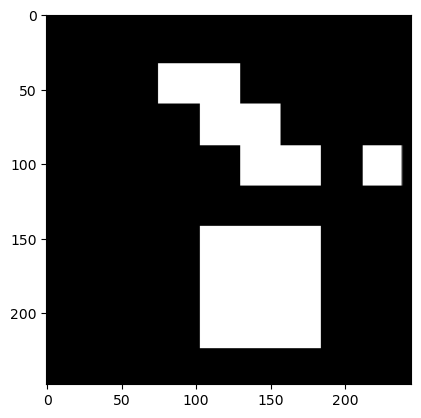

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [7]:
contours, hierarchy = cv.findContours(gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [8]:
contours

(array([[[103, 142]],
 
        [[103, 223]],
 
        [[183, 223]],
 
        [[183, 142]]], dtype=int32),
 array([[[212,  88]],
 
        [[212, 114]],
 
        [[238, 114]],
 
        [[238,  88]]], dtype=int32),
 array([[[ 75,  33]],
 
        [[ 75,  59]],
 
        [[102,  59]],
 
        [[103,  60]],
 
        [[103,  87]],
 
        [[129,  87]],
 
        [[130,  88]],
 
        [[130, 114]],
 
        [[183, 114]],
 
        [[183,  88]],
 
        [[157,  88]],
 
        [[156,  87]],
 
        [[156,  60]],
 
        [[130,  60]],
 
        [[129,  59]],
 
        [[129,  33]]], dtype=int32))

In [9]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

In [12]:
cnt = contours[2]
M = cv.moments(cnt)

In [13]:
M

{'m00': 4267.0,
 'm10': 551172.5,
 'm01': 312909.5,
 'm20': 74273196.33333333,
 'm11': 42513736.75,
 'm02': 25304424.333333332,
 'm30': 10387986555.25,
 'm21': 5987648181.666667,
 'm12': 3576184448.6666665,
 'm03': 2201995927.75,
 'mu20': 3077713.6156745553,
 'mu11': 2094915.238692291,
 'mu02': 2358008.774334036,
 'mu30': -1056219.9327812195,
 'mu21': -190596.59942552447,
 'mu12': 337113.1552209854,
 'mu03': 523825.7870006561,
 'nu20': 0.16903744515037658,
 'nu11': 0.11505915233686305,
 'nu02': 0.12950905400216559,
 'nu30': -0.0008880711300897883,
 'nu21': -0.00016025387534336245,
 'nu12': 0.00028344519113260004,
 'nu03': 0.00044043342129219563}

In [14]:
# 객체의 중심좌표
int(M['m10']/M['m00']), int(M['m01']/M['m00'])

(129, 73)

In [15]:
cv.contourArea(cnt)

4267.0

In [16]:
cv.arcLength(cnt, True)

375.65685415267944

In [17]:
x, y, w, h = cv.boundingRect(cnt)
x, y, w, h

(75, 33, 109, 82)

In [18]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
area, hull

(4267.0,
 array([[[129,  33]],
 
        [[156,  60]],
 
        [[183,  88]],
 
        [[183, 114]],
 
        [[130, 114]],
 
        [[ 75,  59]],
 
        [[ 75,  33]]], dtype=int32))

In [19]:
# solidity = 외곽선 영역 / 블록 껍질 영역
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)

solidity = area / hull_area

solidity

0.7402845246356696

In [20]:
# 객체를 구성하는 모든 좌표 구하기
mask = np.zeros(gray.shape, np.uint8)
cv.drawContours(mask, [cnt], 0, 255, -1)
pixelpoints = np.transpose(np.nonzero(mask))
pixelpoints.shape, pixelpoints

((4455, 2),
 array([[ 33,  75],
        [ 33,  76],
        [ 33,  77],
        ...,
        [114, 181],
        [114, 182],
        [114, 183]], dtype=int64))

In [21]:
# 극단 점 좌표 구하기
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

leftmost, rightmost, topmost, bottommost

((75, 33), (183, 114), (75, 33), (130, 114))

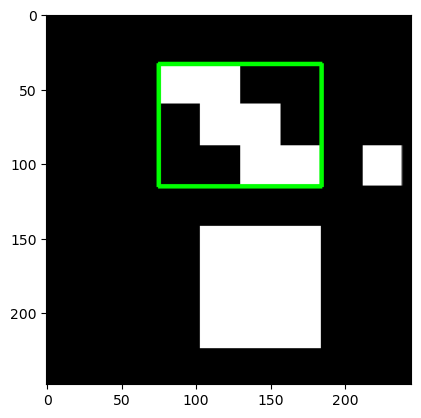

In [22]:
x, y, w, h = cv.boundingRect(cnt)

# 이미지 위에 초록색 바운딩 박스 그리기
img = cv.imread('./contours.png')
cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img)